In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# What to add 5.29.2023:
- SMOTE (oversample churn data)
- Dummy out the area code (could regions within state be better than state as a predictor?)


In [2]:
pd.read_csv("Raw_Data/Churn_Data.csv")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


# Load the dataset into a Pandas DataFrame:

In [3]:
data = pd.read_csv("Raw_Data/Churn_Data.csv")

In [4]:
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


array([415, 408, 510], dtype=int64)

# Define the features (X) and the target variable (y):

In [5]:
X = data.drop('churn', axis=1)  # Features
y = data['churn']  # Target variable

# Cleaning:

In [71]:
data['area code'].unique()

array([415, 408, 510], dtype=int64)

- Was looking to see if area code was a more granular version of 'state'. Removing since there are only 3 types of area code. 

In [6]:
X_encoded = pd.get_dummies(X, columns=['state', 'international plan', 'voice mail plan'])

In [7]:
X_encoded = X_encoded.drop(columns=['phone number', 'area code', 'international plan_no', 'voice mail plan_no'])

In [8]:
X_encoded

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,0,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,0,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,0,0,0,0,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,0,0,0,0,1,0,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,0,0,0,0,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,0,0,0,1,0


# Split the data into training and testing sets:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [10]:
X_train.to_excel('Testing_Outputs/DT_X_train.xlsx', index=False)

PermissionError: [Errno 13] Permission denied: 'Testing_Outputs/DT_X_train.xlsx'

In [11]:
X_train

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
817,243,0,95.5,92,16.24,163.7,63,13.91,264.2,118,...,0,1,0,0,0,0,0,0,0,0
1373,108,0,112.0,105,19.04,193.7,110,16.46,208.9,93,...,0,0,0,0,0,0,0,0,0,0
679,75,0,222.4,78,37.81,327.0,111,27.80,208.0,104,...,1,0,0,0,0,0,0,0,1,0
56,141,0,126.9,98,21.57,180.0,62,15.30,140.8,128,...,0,0,0,0,0,0,0,0,0,0
1993,86,0,216.3,96,36.77,266.3,77,22.64,214.0,110,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,274.4,120,46.65,198.6,82,16.88,160.8,62,...,0,0,0,0,0,0,0,0,0,0
1130,122,0,35.1,62,5.97,180.8,89,15.37,251.6,58,...,0,0,0,0,0,0,0,0,0,0
1294,66,0,87.6,76,14.89,262.0,111,22.27,184.6,125,...,0,0,0,0,0,0,0,0,0,0
860,169,0,179.2,111,30.46,175.2,130,14.89,228.6,92,...,0,0,0,0,0,0,0,0,0,0


# Create an instance of the DecisionTreeClassifier and fit the model on the training data:

In [12]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Make predictions on the test set:

In [13]:
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model:

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9265367316341829


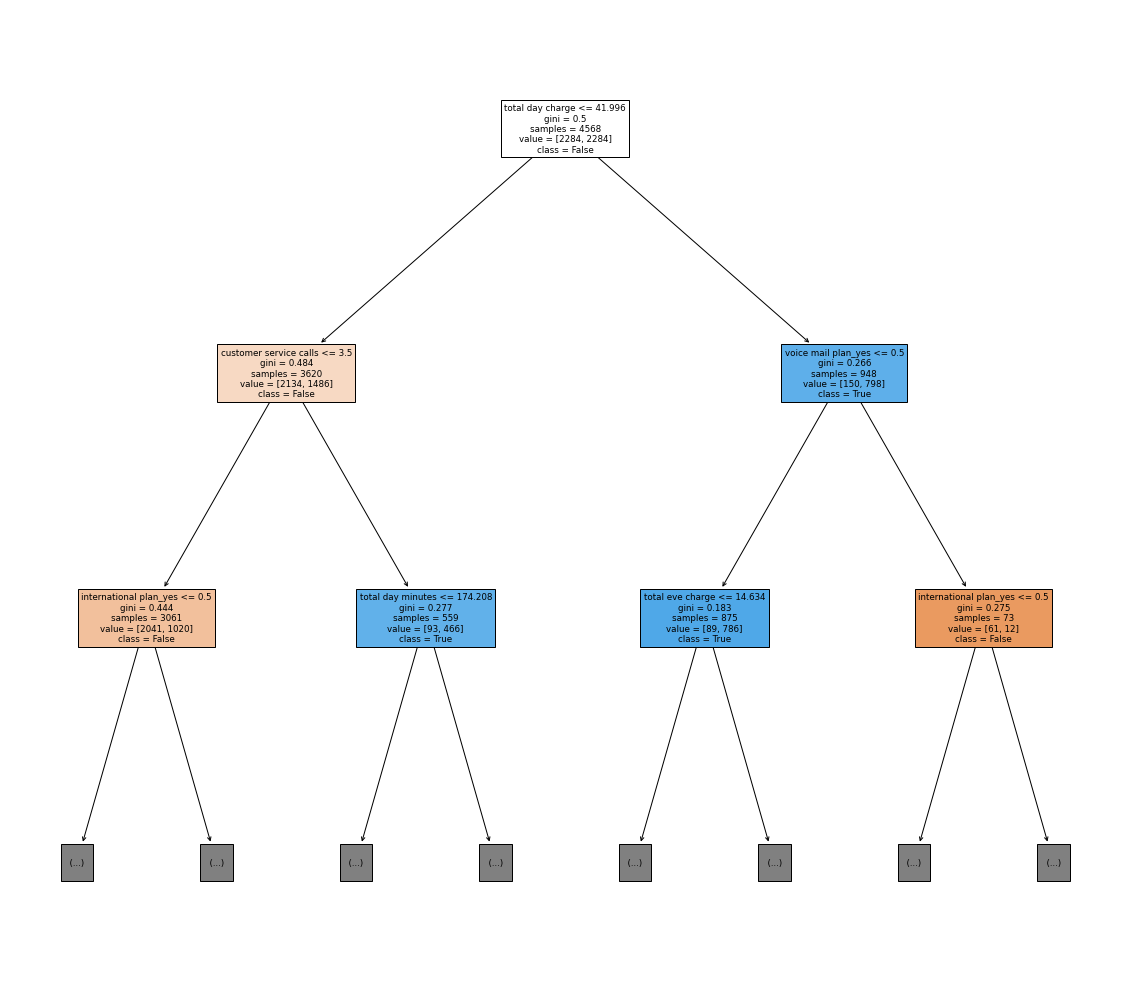

In [60]:
plt.figure(figsize=(20, 18))
plot_tree(model, max_depth=2, feature_names=X_encoded.columns, class_names=['False', 'True'], label='all', filled=True)
plt.show()

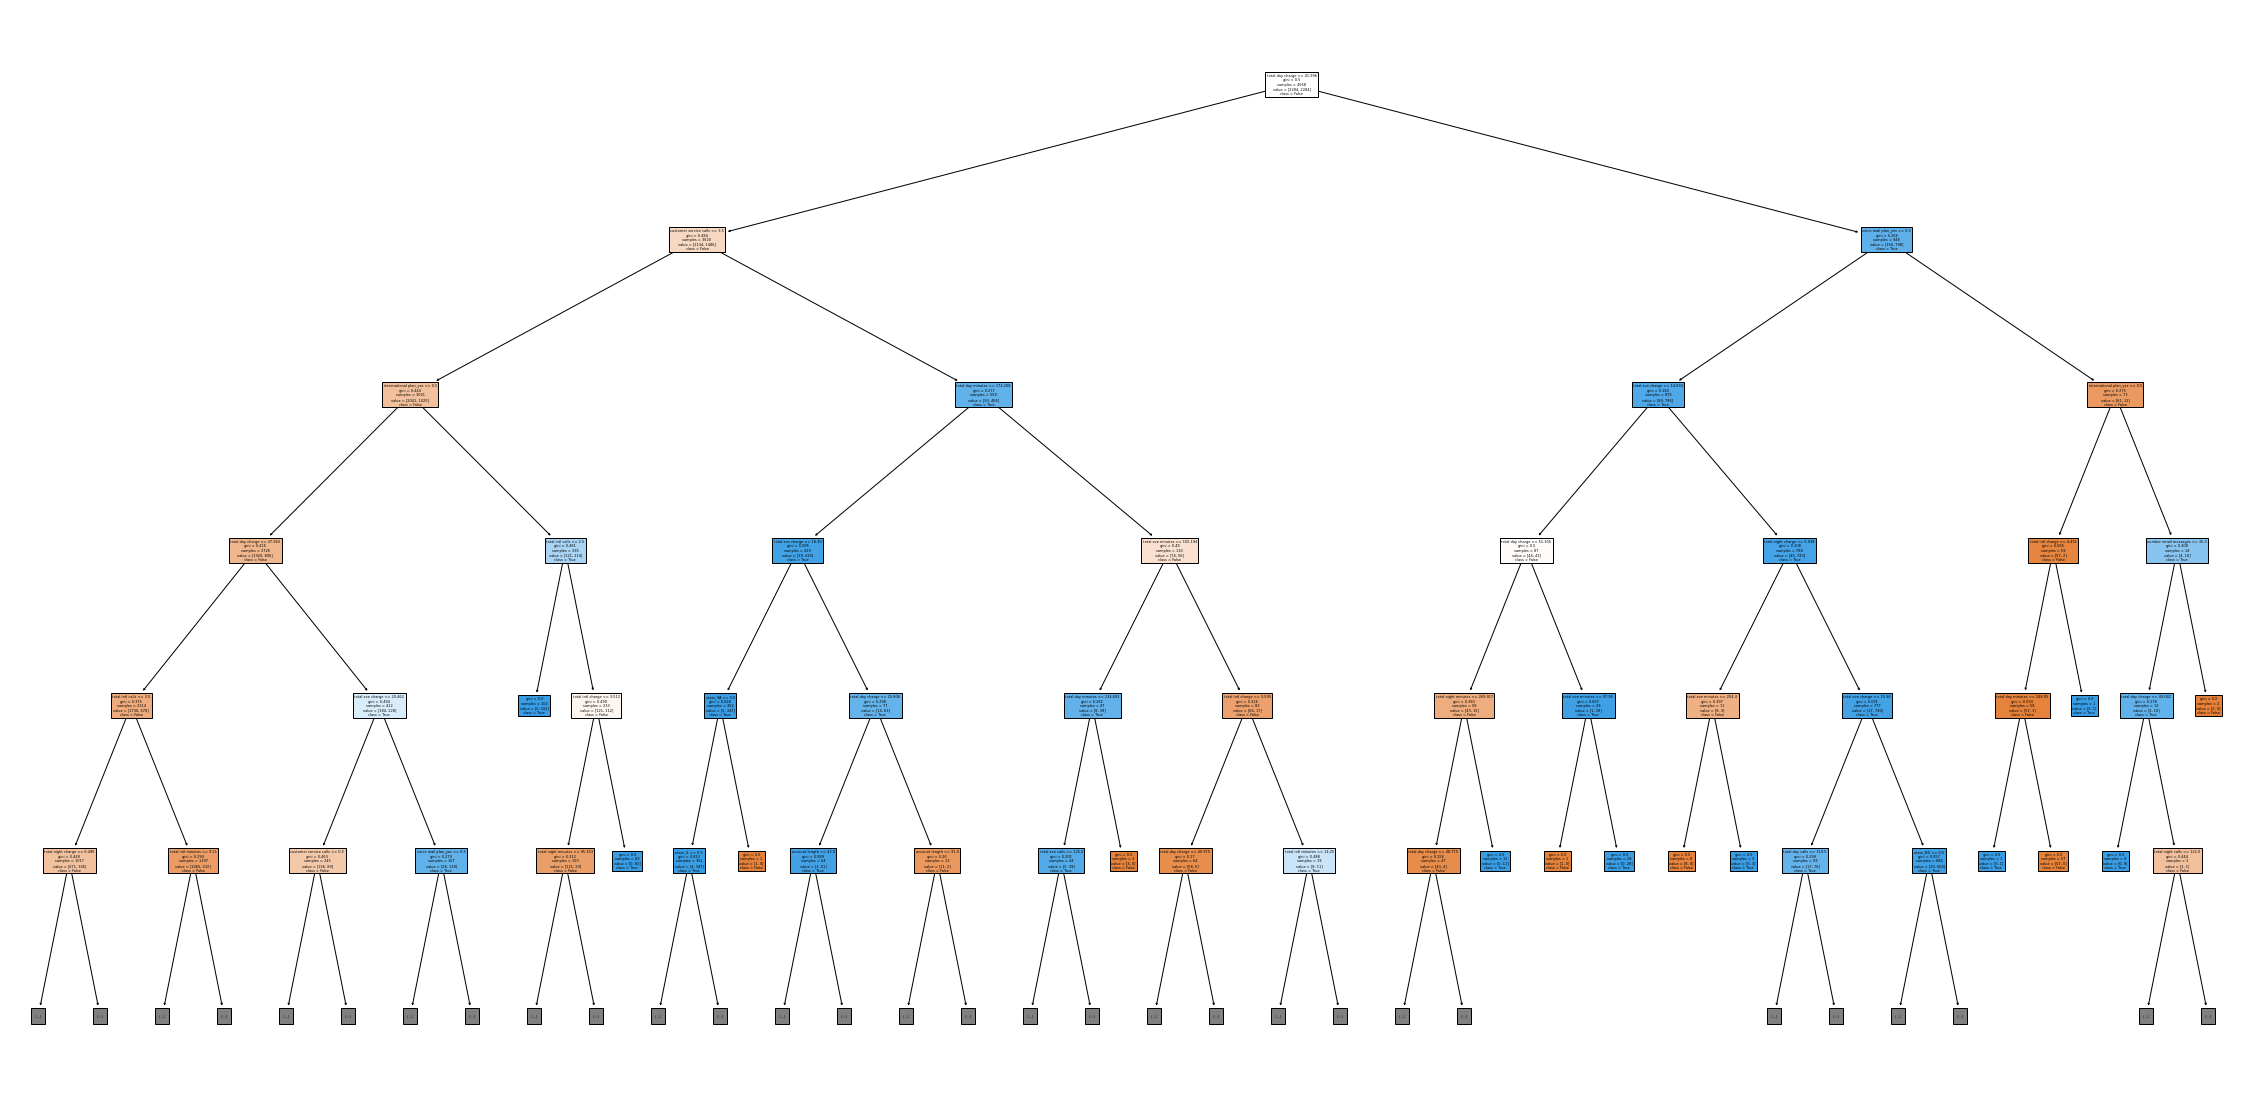

In [63]:
plt.figure(figsize=(40, 20))
plot_tree(model, max_depth=5, feature_names=X_encoded.columns, class_names=['False', 'True'], filled=True)
plt.show()

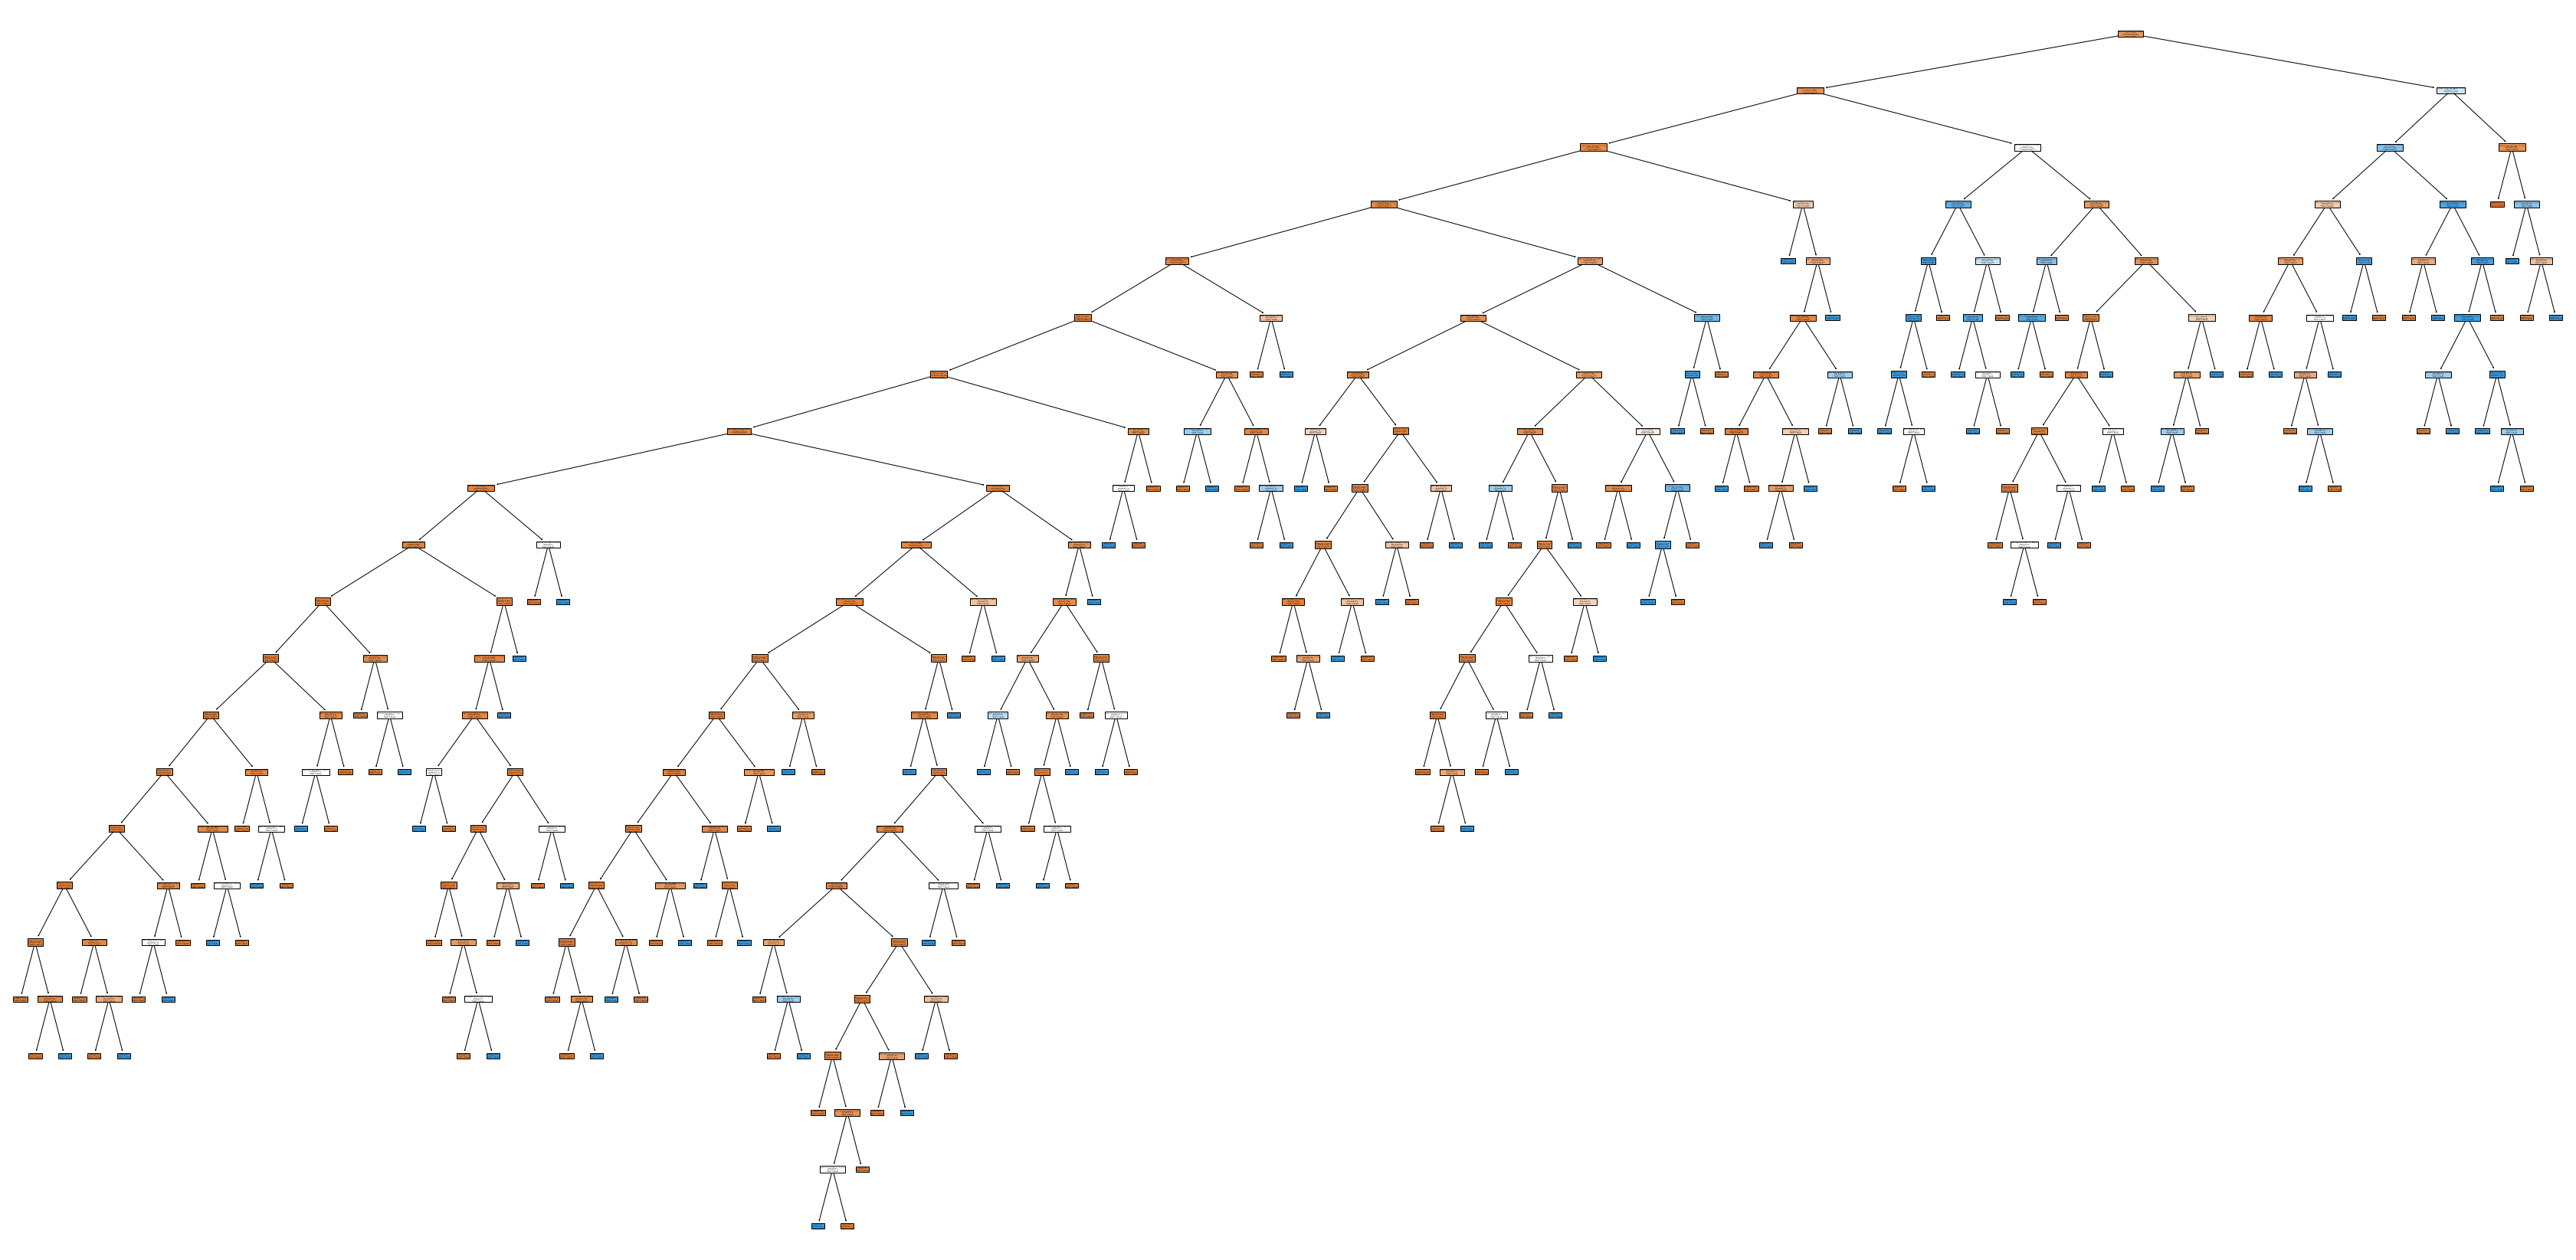

In [17]:
plt.figure(figsize=(60, 30))
plot_tree(model, feature_names=X_encoded.columns, class_names=['False', 'True'], filled=True)
plt.show()

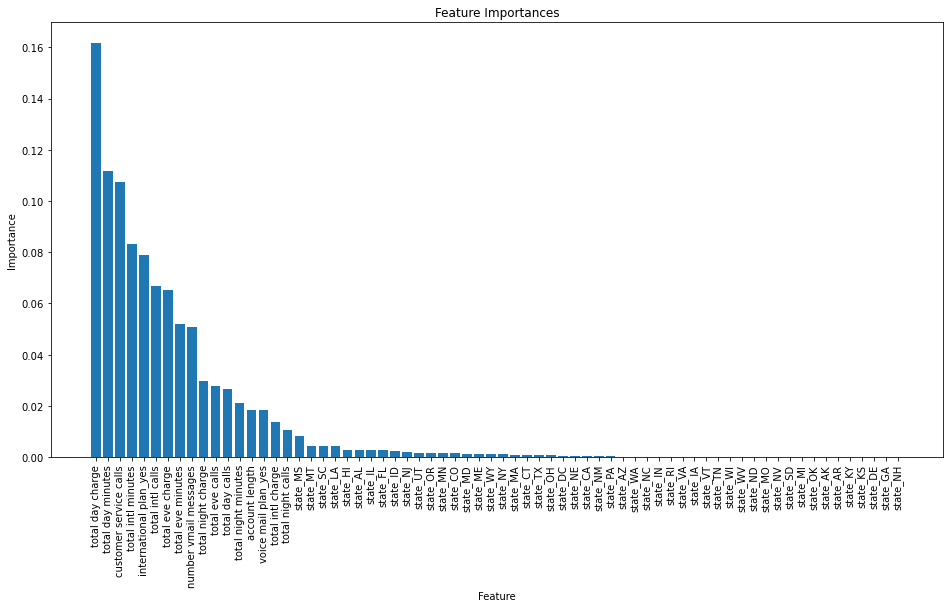

In [18]:
# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create bar plot of feature importances
plt.figure(figsize=(16, 8))
plt.bar(range(X_encoded.shape[1]), importances[indices])
plt.xticks(range(X_encoded.shape[1]), X_encoded.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

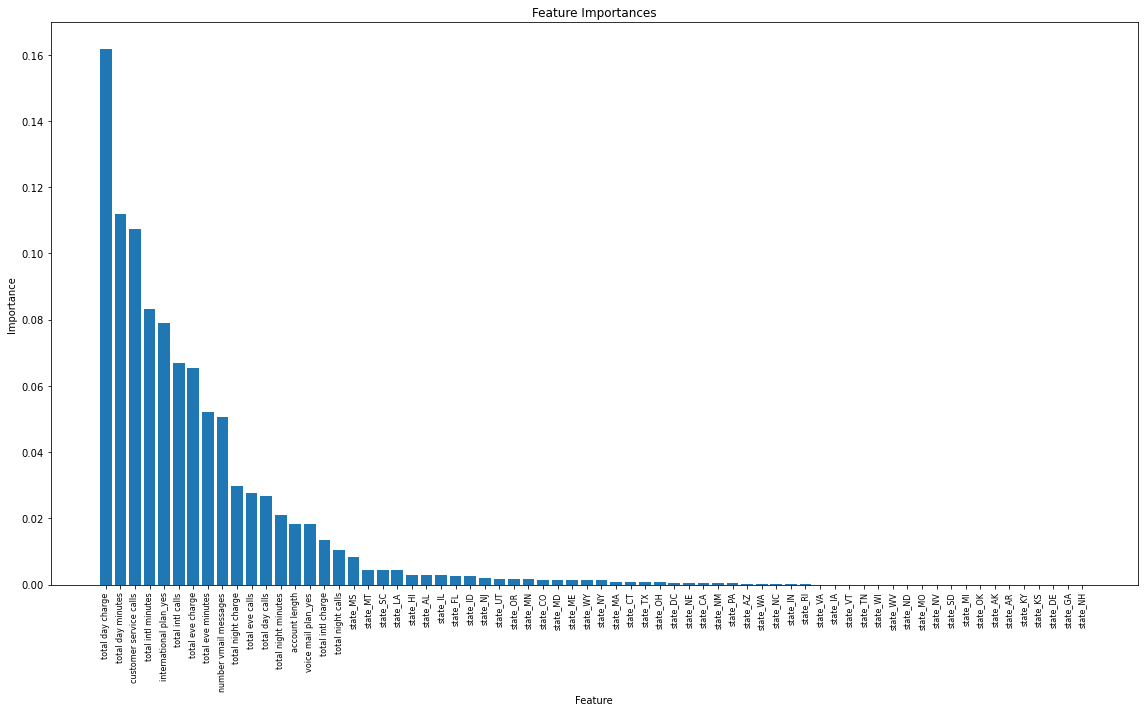

In [19]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(16, 10))
plt.bar(range(X_encoded.shape[1]), importances[indices])
plt.xticks(range(X_encoded.shape[1]), X_encoded.columns[indices], fontsize=8, rotation=90) 
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


In [20]:
def print_decision_rules(tree, feature_names, class_names, node_index=0, pad=""):
    left_child = tree.tree_.children_left[node_index]
    right_child = tree.tree_.children_right[node_index]

    if left_child == -1 and right_child == -1:
        # Leaf node reached
        class_label = class_names[np.argmax(tree.tree_.value[node_index])]

        print(pad + "Class:", class_label)
        return

    feature_index = tree.tree_.feature[node_index]
    threshold = tree.tree_.threshold[node_index]
    feature_name = feature_names[feature_index]

    print(pad + "if", feature_name, "<=", threshold, "then:")
    print_decision_rules(tree, feature_names, class_names, left_child, pad + "  ")

    print(pad + "if", feature_name, ">", threshold, "then:")
    print_decision_rules(tree, feature_names, class_names, right_child, pad + "  ")

# Display decision rules of the trained decision tree model
print_decision_rules(model, X_encoded.columns, ['False', 'True'])

if total day charge <= 44.80500030517578 then:
  if customer service calls <= 3.5 then:
    if international plan_yes <= 0.5 then:
      if total day minutes <= 223.25 then:
        if total eve charge <= 29.0 then:
          if state_TX <= 0.5 then:
            if state_DC <= 0.5 then:
              if total night calls <= 104.5 then:
                if total night minutes <= 353.5500030517578 then:
                  if total day calls <= 124.5 then:
                    if state_NC <= 0.5 then:
                      if state_RI <= 0.5 then:
                        if state_IN <= 0.5 then:
                          if state_MN <= 0.5 then:
                            if state_ME <= 0.5 then:
                              if state_LA <= 0.5 then:
                                if state_UT <= 0.5 then:
                                  Class: False
                                if state_UT > 0.5 then:
                                  if total day charge <= 36.165000915527344 then:
  

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       566
        True       0.77      0.73      0.75       101

    accuracy                           0.93       667
   macro avg       0.86      0.85      0.85       667
weighted avg       0.93      0.93      0.93       667

Confusion Matrix:
[[544  22]
 [ 27  74]]


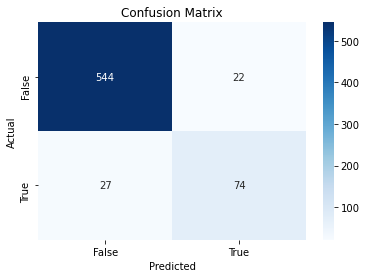

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your predicted labels in y_pred and true labels in y_test
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_test))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot
plt.show()

# Oversampling with SMOTE

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [30]:
model2 = DecisionTreeClassifier()
model2.fit(X_train_oversampled, y_train_oversampled)

y_pred2 = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)



Accuracy: 0.8350824587706147


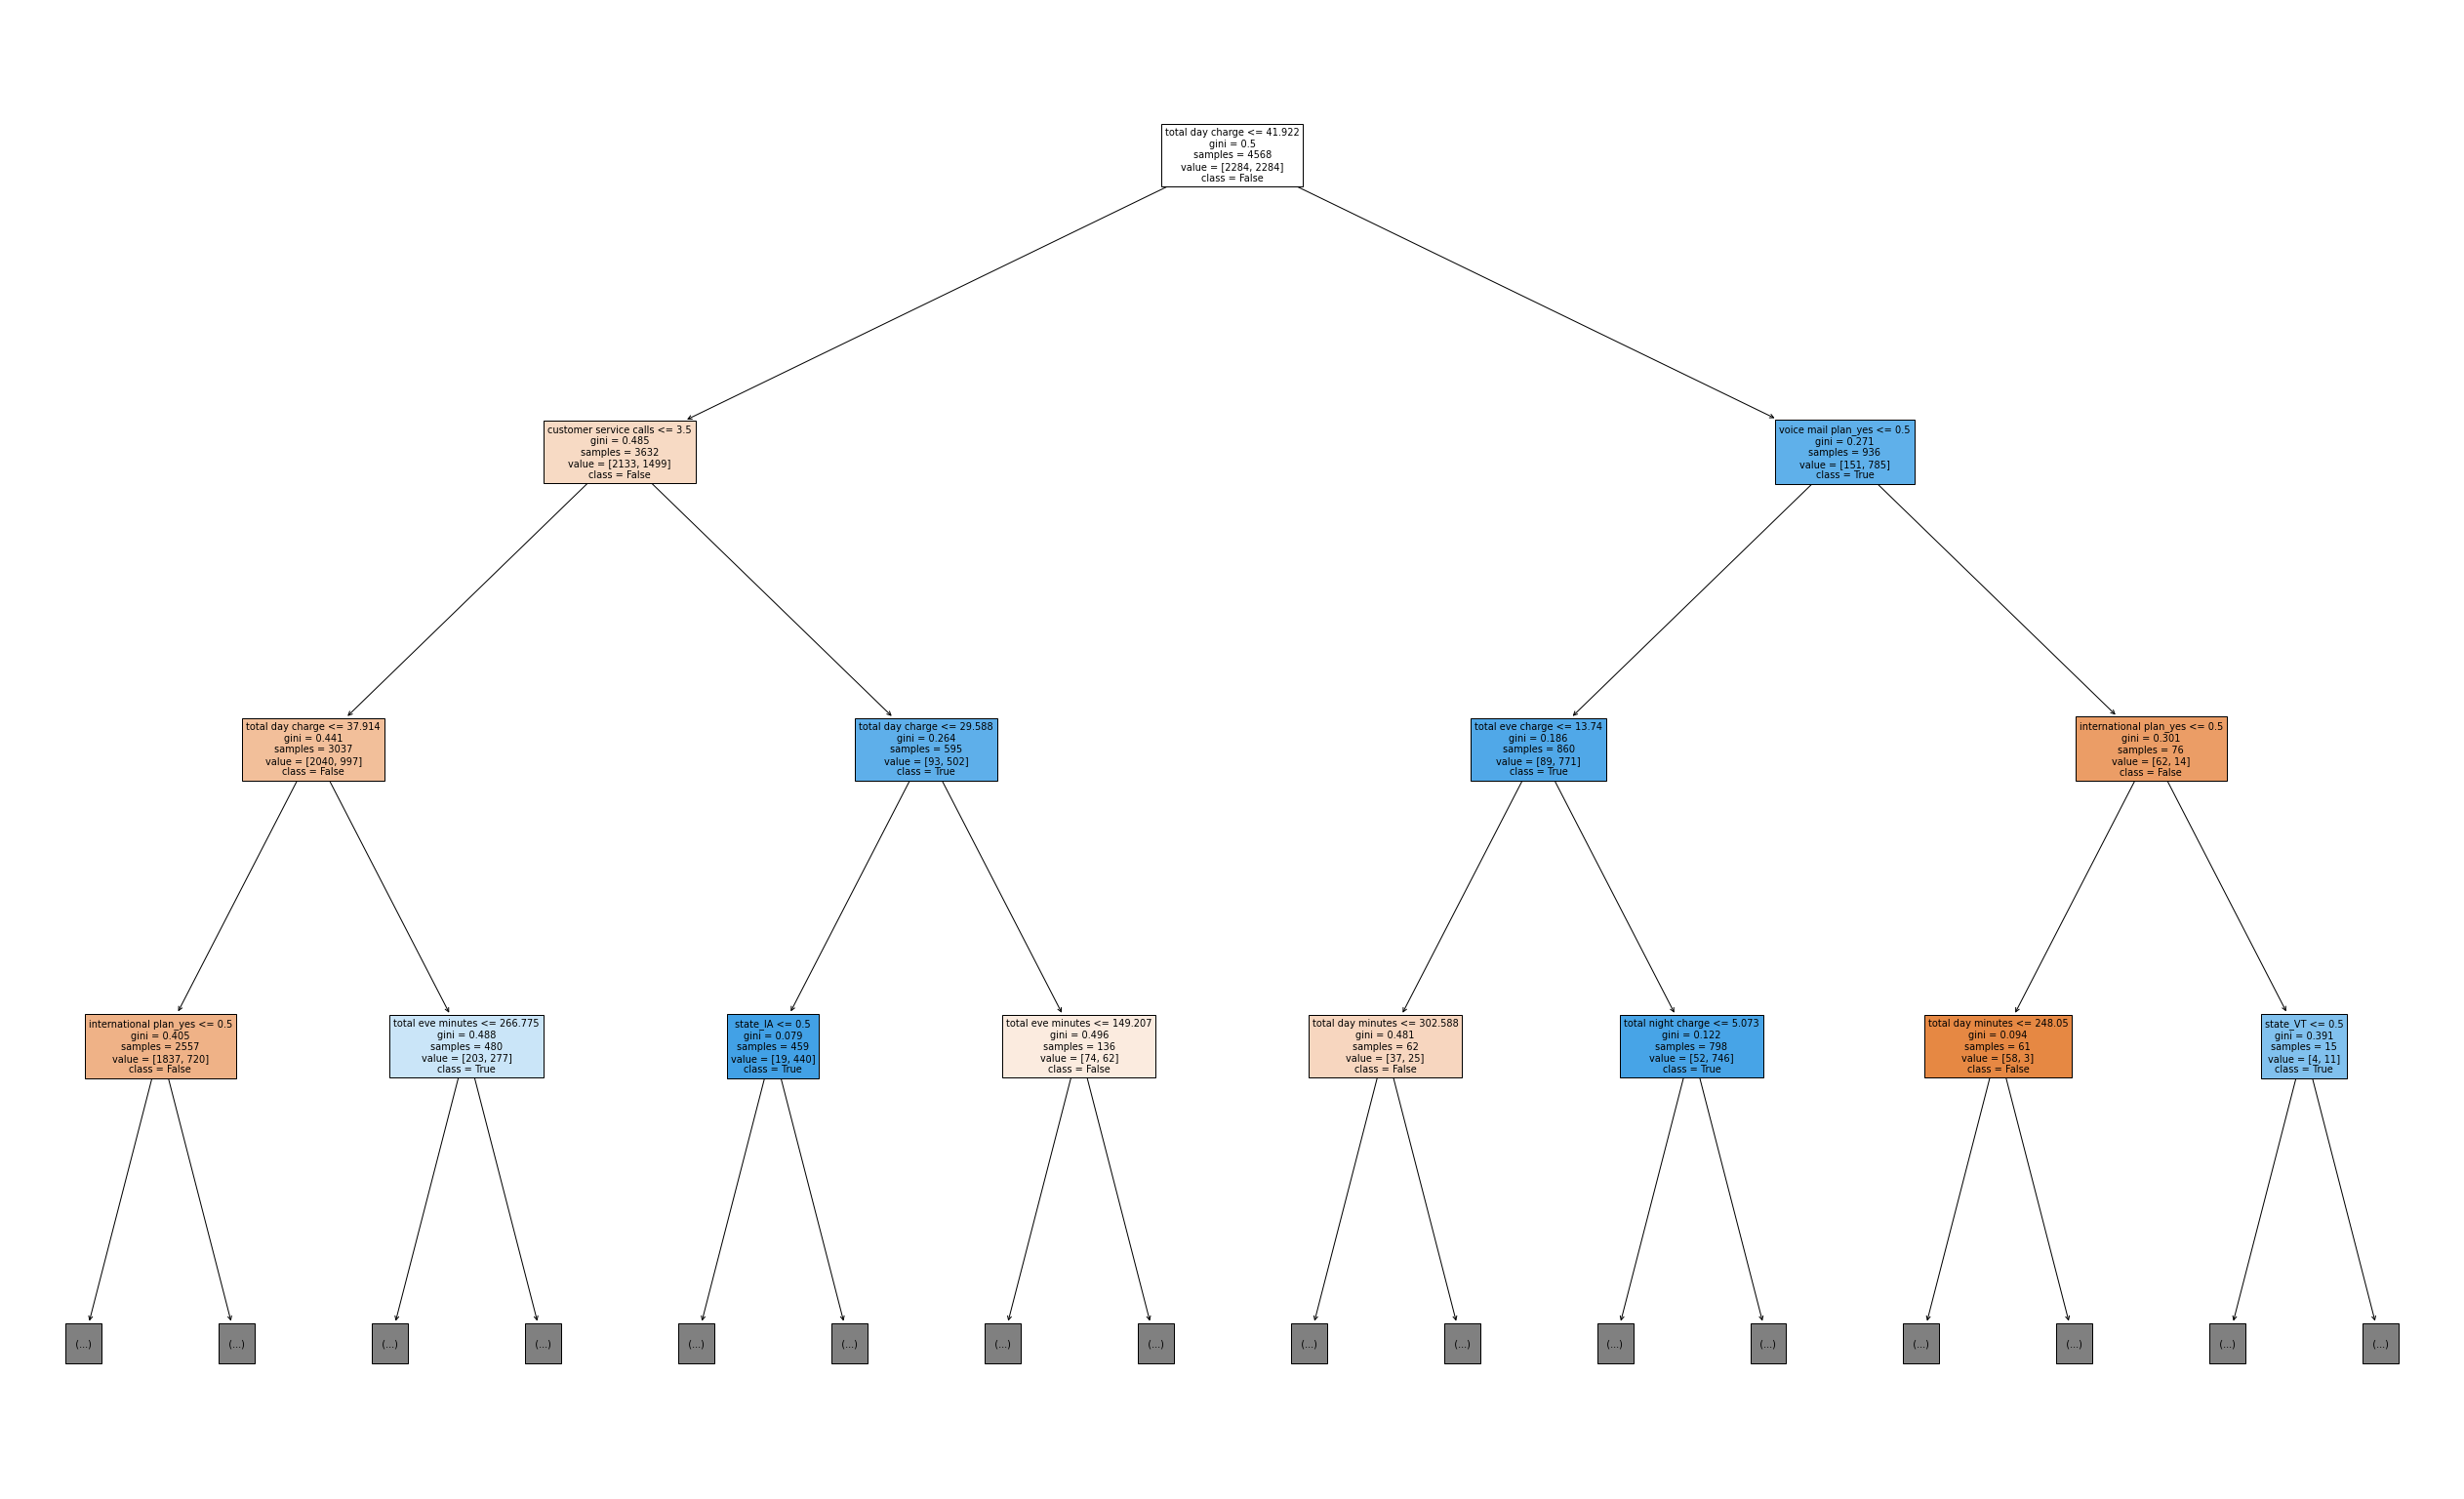

In [68]:
plt.figure(figsize=(45, 28))
plot_tree(model2, feature_names=X_encoded.columns, max_depth=3, class_names=['False', 'True'], filled=True)
plt.show()

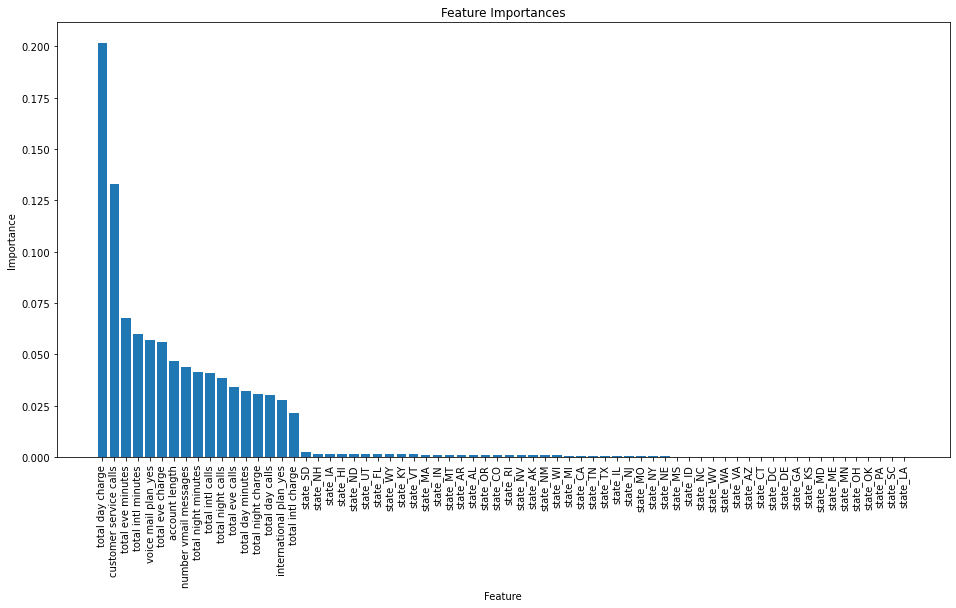

In [32]:
# Get feature importances
importances = model2.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create bar plot of feature importances
plt.figure(figsize=(16, 8))
plt.bar(range(X_encoded.shape[1]), importances[indices])
plt.xticks(range(X_encoded.shape[1]), X_encoded.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.84      0.90       566
        True       0.47      0.80      0.60       101

    accuracy                           0.84       667
   macro avg       0.72      0.82      0.75       667
weighted avg       0.89      0.84      0.85       667

Confusion Matrix:
[[476  90]
 [ 20  81]]


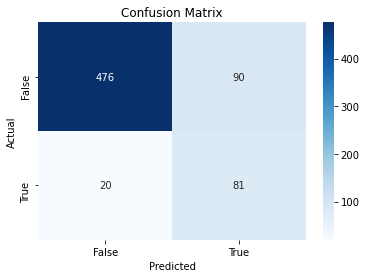

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your predicted labels in y_pred and true labels in y_test
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_test))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot
plt.show()

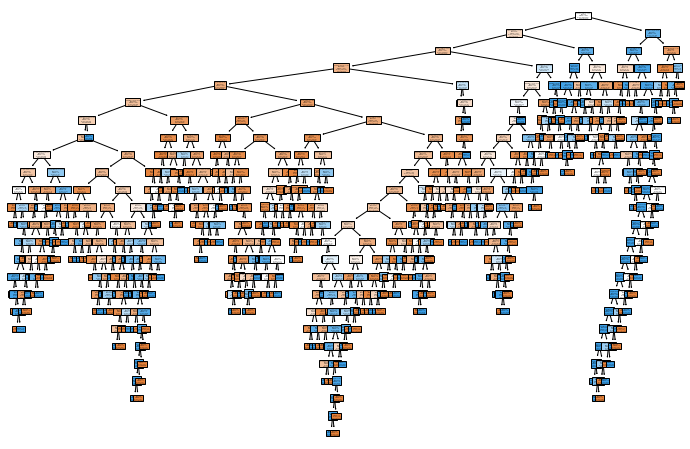

In [36]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(model2, feature_names=X_encoded.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()

In [37]:
importances = model2.feature_importances_

In [41]:
instance = X.iloc[0]  # Replace 0 with the index of the instance you want to examine
prediction = model2.predict([instance])

ValueError: could not convert string to float: 'KS'

In [43]:
def print_decision_tree_splits(tree, feature_names, depth=0):
    indent = "  " * depth
    if tree.children_left[0] == tree.children_right[0]:  # Check if it's a leaf node
        class_label = np.argmax(tree.value[0])
        print(f"{indent}Leaf Node: Class {class_label}")
    else:
        feature_index = tree.feature[0]
        threshold = tree.threshold[0]
        feature_name = feature_names[feature_index]
        print(f"{indent}Internal Node: Split on {feature_name} <= {threshold}")
        print_decision_tree_splits(tree.children_left, feature_names, depth+1)
        print_decision_tree_splits(tree.children_right, feature_names, depth+1)

In [44]:
print_decision_tree_splits(model.tree_, feature_names)

NameError: name 'feature_names' is not defined